# Projet Datamining

*Théo Bruendet, Arthur Saunier, Ethan Caillot-Gallois*

## Collecte de données

Image pokemon de kaggle  
licence: Attribution 4.0 International (CC BY 4.0)  
Vishal Subbiah (Owner)  
data scrapped from: https://pokemondb.net/pokedex/national  
Source dataset: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types?resource=download  



In [10]:
from PIL import Image, ExifTags
import csv

file_list = []
row_list = []
#new_row = {}
#Boucle qui parcoure le csv pokemon.csv, pour ensuite extraire le nom de chaque image (pour ensuite ouvrir tout les fichiers)

#bite

with open('data/pokemon.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    field_names = reader.fieldnames
    field_names.append('dpi')
    for row in reader:
        #on récupère les données exif contenues dans les images
        imgfile = "data/images/" + row['Name'] + ".png"
        file_list.append(imgfile)
        img = Image.open(imgfile)
        img.load()
        #on rentre les données de dpi 
        if 'dpi' in img.info:
            #new_row = {'Name' : str(row['Name']), 'Type1': str(row['Type1']), 'Type2' : str(row['Type2']), 'dpi' : str(img.info['dpi'])}
            new_row = [str(row['Name']), str(row['Type1']), str(row['Type2']), str(img.info['dpi'])]
            row_list.append(new_row)

#on récupère les données exif contenues dans les images puis on les inscrit dans le CSV
with open('data/pokemon.csv', newline='') as csvfile:
    writer = csv.writer(csvfile, field_names)
    writer.writerows(row_list)

{'gamma': 0.45455, 'srgb': 0, 'dpi': (95.9866, 95.9866), 'transparency': b'\x00\x11\x11\x11\x11\x11"33DDDDDUfffwwwwwwwww\x88\x88\x88\x88\x88\x88\x88\x88\x88\x99\x99\x99\x99\x99\xbb\xbb\xbb\xbb\xbb\xbb\xbb\xbb\xbb\xbb\xbb\xcc\xcc\xcc\xcc\xcc\xcc\xdd\xee\xee\xee\xee\xee\xee\xee\xee\xee'}


            Name     Type1   Type2
0      bulbasaur     Grass  Poison
1        ivysaur     Grass  Poison
2       venusaur     Grass  Poison
3     charmander      Fire   Aucun
4     charmeleon      Fire   Aucun
..           ...       ...     ...
804    stakataka      Rock   Steel
805  blacephalon      Fire   Ghost
806      zeraora  Electric   Aucun
807       meltan     Steel   Aucun
808     melmetal     Steel   Aucun

[809 rows x 3 columns]
    Type1   Type2
0   Grass  Poison
1   Grass  Poison
2   Grass  Poison
3    Fire   Aucun
4    Fire   Aucun
5    Fire  Flying
6   Water   Aucun
7   Water   Aucun
8   Water   Aucun
9     Bug   Aucun
10    Bug   Aucun
11    Bug  Flying
12    Bug  Poison
13    Bug  Poison
14    Bug  Poison


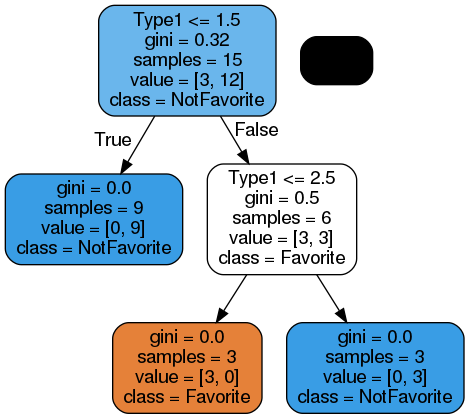

['Favorite']
[1. 0.]
['NotFavorite']
[0.62542458 0.37457542]


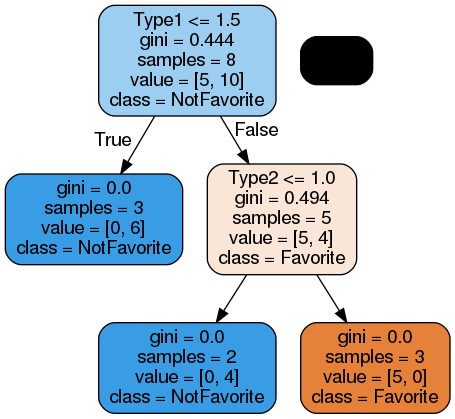

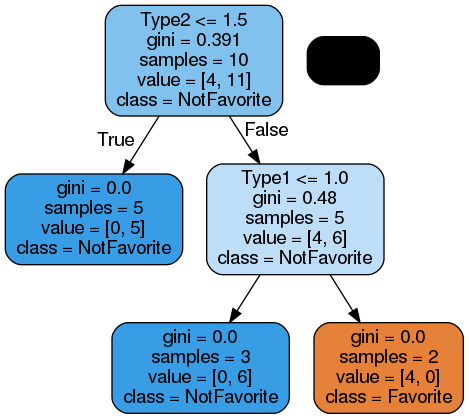

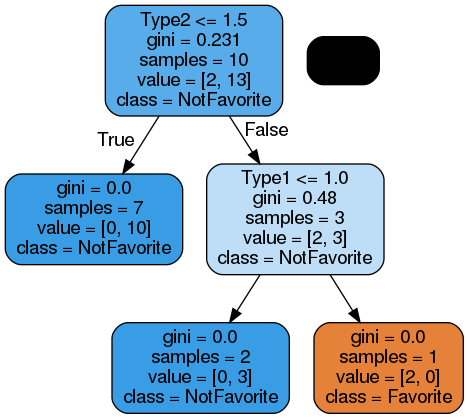

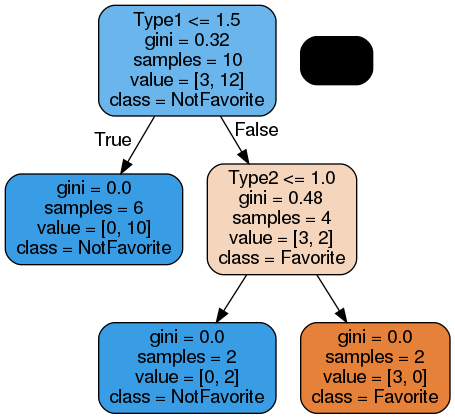

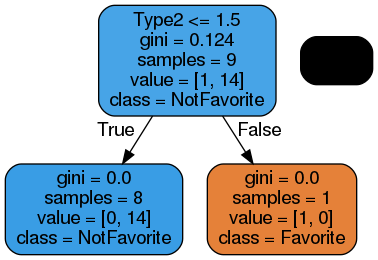

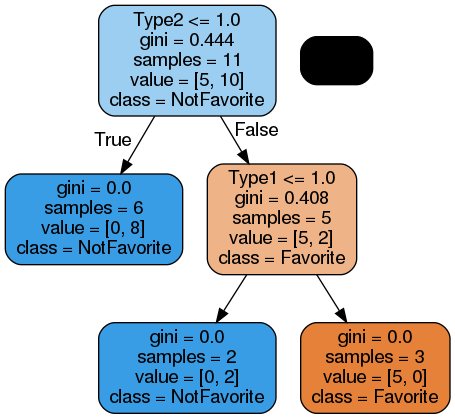

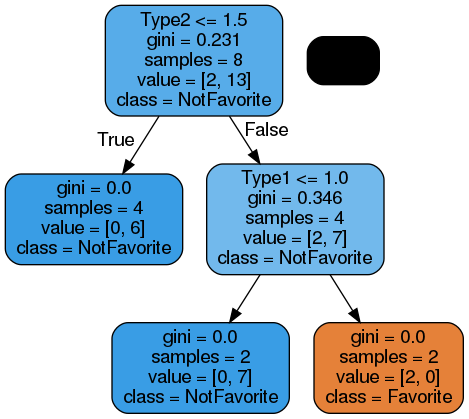

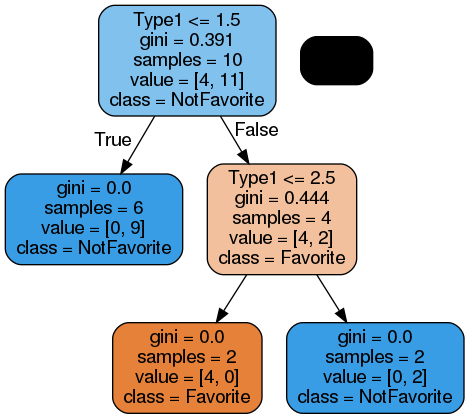

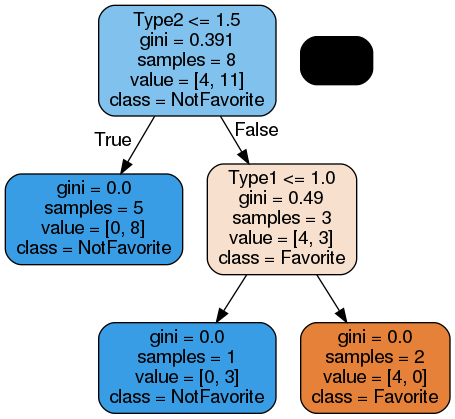

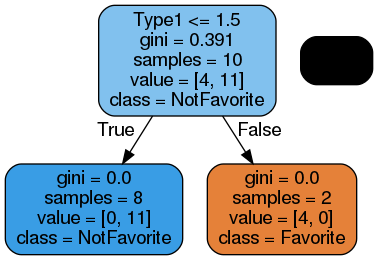

In [49]:
import numpy as np 
import pandas as pd
from sklearn import tree
from enum import Enum
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display
from sklearn.ensemble import RandomForestClassifier

class Types(Enum):
    Aucun = 0
    Bug = 1
    Dark = 2
    Dragon = 3
    Electric = 4
    Fairy = 5
    Fighting = 6
    Fire = 7
    Flying = 8
    Ghost = 9
    Grass = 10
    Ground = 11
    Ice = 12
    Normal = 13
    Poison = 14
    Psychic = 15
    Rock = 16
    Steel = 17
    Water = 18
    def __str__(self):
        return self.name
    
    
df = pd.read_csv('data/pokemon.csv')
df['Type2'] = dataset['Type2'].fillna('Aucun')


#df["value1"] = df["Type1"].apply(lambda x: getattr(Types, x).value)
#df["value2"] = df["Type2"].apply(lambda x: getattr(Types, x).value)


result = [
              'Favorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite'
              ]

#data = df.drop(columns=['Name','Type1','Type2'])
data = df.drop(columns=['Name'])
data = data.drop(labels=range(15, 809), axis=0)



print(df)
print(data)

#Use of decision tree classifiers
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
data['Type1'] = le1.fit_transform(data['Type1'])

le2 = LabelEncoder()
data['Type2'] = le2.fit_transform(data['Type2'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Creation de l'arbre de decision
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, resultframe)

#Affichage de l'arbre de decision
dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=data.columns,
        filled=True, rounded=True, 
        class_names =
        le5.inverse_transform(
        resultframe.favorite.unique())
        ) 
graph = graphviz.Source(dot_data) 
     
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2,
                  random_state=0)
rfc = rfc.fit(data, resultframe.values.ravel())


#prediction dtc
prediction = dtc.predict([
        [le1.transform(['Grass'])[0], le2.transform(['Aucun'])[0]]])
print(le5.inverse_transform(prediction))
print(dtc.feature_importances_)

#prediction rtc
prediction = rfc.predict([
        [le1.transform(['Grass'])[0], le2.transform(['Aucun'])[0]]])
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)

#Affichage rtc
#test mabite
for i in range(10):
        dot_data = tree.export_graphviz(rfc.estimators_[i], out_file=None,
        feature_names=data.columns,
        filled=True, rounded=True,
        class_names =
         le5.inverse_transform(
           resultframe.favorite.unique())
        ) 
        graph = graphviz.Source(dot_data) 
        pydot_graph = pydotplus.graph_from_dot_data(dot_data)
        img = Image(pydot_graph.create_png())
        display(img)
